# SECOM Dataset Failure Analysis Project

# ============================
# 1. Project Overview
# ============================
# This project analyzes the SECOM dataset to detect failure patterns in a semiconductor manufacturing process.
# We preprocess the data, perform exploratory analysis, build predictive models, and prepare the data for Power BI visualization.

# ============================
# 2. Data Preprocessing
# ============================

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load Data
data = pd.read_csv("secom.data", sep=" ", header=None)
labels = pd.read_csv("secom_labels.data", sep=" ", header=None)

# Fill missing values
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)
data_clean = pd.DataFrame(data_imputed)

# Combine data and labels
data_clean['label'] = labels[0]

# Train-Test Split
X = data_clean.drop('label', axis=1)
y = data_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ============================
# 3. Exploratory Data Analysis (EDA)
# ============================

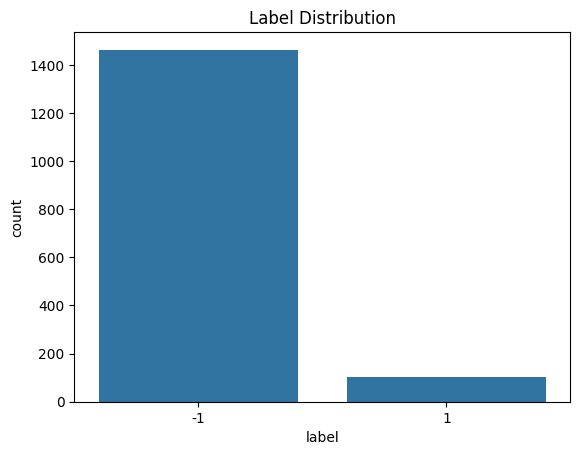

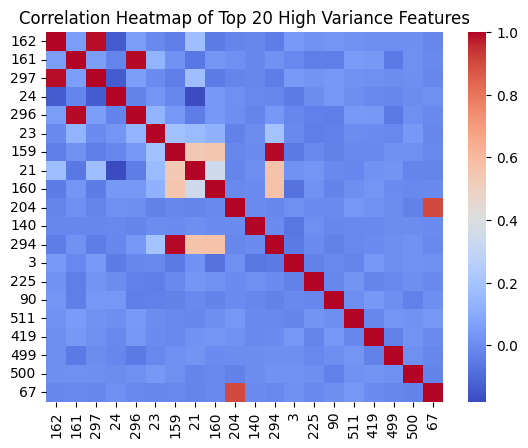

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label distribution
sns.countplot(x=y)
plt.title("Label Distribution")
plt.show()

# Top 20 High Variance Features
variances = X.var().sort_values(ascending=False)
top_20_features = variances.head(20).index
sns.heatmap(X[top_20_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Top 20 High Variance Features")
plt.show()

# ============================
# 4. Feature Selection: Random Forest
# ============================

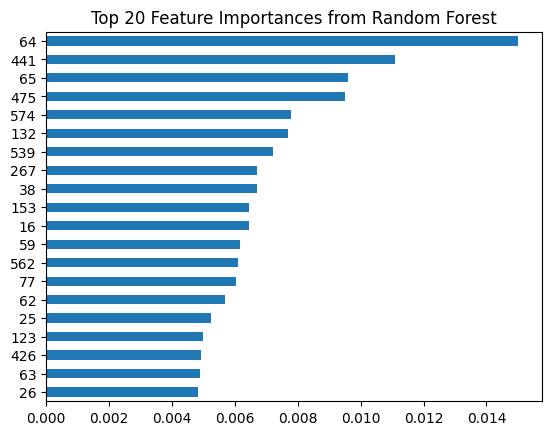

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20)

important_features.plot(kind='barh')
plt.title("Top 20 Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.show()

# ============================
# 5. Dimensionality Reduction (PCA)
# ============================

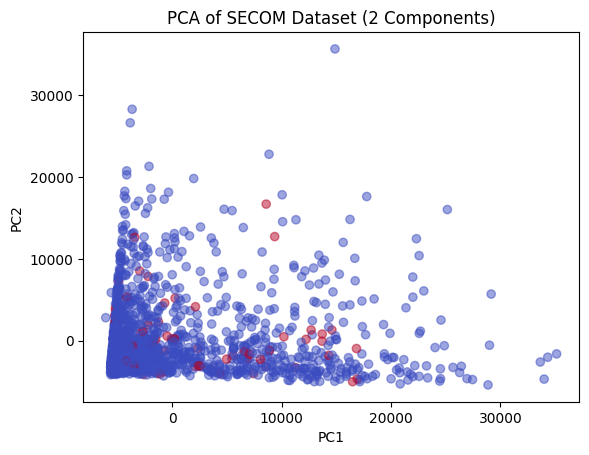

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA of SECOM Dataset (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ============================
# 6. Modeling
# ============================

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (RBF)': SVC(kernel='rbf'),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, preds))
    print("\n" + "="*50 + "\n")

C:\Users\dolla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       440
           1       0.15      0.06      0.09        31

    accuracy                           0.92       471
   macro avg       0.55      0.52      0.52       471
weighted avg       0.89      0.92      0.90       471



=== Random Forest ===
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



=== SVM (RBF) ===
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
we

C:\Users\dolla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dolla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dolla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

=== Gradient Boosting ===
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       440
           1       0.18      0.06      0.10        31

    accuracy                           0.92       471
   macro avg       0.56      0.52      0.53       471
weighted avg       0.89      0.92      0.90       471





# ============================
# 7. Prepare for Power BI
# ============================

In [10]:
# Export predictions from best model (e.g., Random Forest)
best_model = models['Random Forest']
predictions = best_model.predict(X)
data_clean['prediction'] = predictions

# Add PCA components for Power BI scatter plot
final_output['pca_1'] = X_pca[:, 0]
final_output['pca_2'] = X_pca[:, 1]

# Rename columns
feature_names = [f"sensor_{i+1}" for i in range(X.shape[1])]
final_output.columns = feature_names + ['label', 'prediction', 'pca_1', 'pca_2']

# Export with headers
final_output.to_csv("secom_model_output.csv", index=False)
print("Exported with column names for Power BI.")

Exported with column names for Power BI.


# ============================
# To create correlation Heatmap in Power BI
# ============================

In [11]:
# Compute correlation of top 20 features from earlier
corr_matrix = X[top_20_features].corr()

# Reset index to flatten for heatmap
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']
corr_long.to_csv("correlation_heatmap.csv", index=False)